In [13]:
from statistics import mean
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()

In [14]:
actual = pd.read_csv("/Users/mz195/BTC_price_db.csv")
arima = pd.read_csv("/Users/mz195/arima_predictions.csv")
varmax = pd.read_csv("/Users/mz195/varmax_predictions.csv")
ses = pd.read_csv("/Users/mz195/ses_predictions.csv")
rf = pd.read_csv("/Users/mz195/random_forest_predictions.csv")
overall = pd.read_csv("/Users/mz195/overall_predictions.csv")

In [18]:
print("Actual:\t{}".format(actual.shape))
print("ARIMA:\t{}".format(arima.shape))
print("VARMAX:\t{}".format(varmax.shape))
print("SES:\t{}".format(ses.shape))
print("Random Forest:\t{}".format(rf.shape))
print("Overall:\t{}".format(overall.shape))

Actual:	(7889, 2)
ARIMA:	(7891, 2)
VARMAX:	(7891, 2)
SES:	(7891, 2)
Random Forest:	(7890, 2)
Overall:	(7890, 2)


In [19]:
arima_df = actual.merge(arima, on='time_')
arima_varmax_df = arima_df.merge(varmax, on='time_')
arima_varmax_ses_df = arima_varmax_df.merge(ses, on='time_')
arima_varmax_ses_rf_df = arima_varmax_ses_df.merge(rf, on='time_')
all_models_df = arima_varmax_ses_rf_df.merge(overall, on='time_')
all_models_df.shape

(7889, 7)

In [20]:
all_models_df.head()

,time_,price_avg,arima,varmax,ses,rf,overall
0,2021-07-08 00:00:00,34539.983125,34541.292496,34543.818293,34541.196787,33144.467728,33143.300118
1,2021-07-08 00:00:30,34542.602200,34544.581490,34546.455610,34544.881654,34541.692591,34543.851095
2,2021-07-08 00:01:00,34531.344167,34543.082285,34545.040597,34544.857623,34547.819306,34545.841196
3,2021-07-08 00:01:30,34529.602233,34538.405761,34541.172300,34540.707881,34545.768235,34544.034280
4,2021-07-08 00:02:00,34521.607000,34531.363881,34537.049044,34534.654404,34535.281940,34534.630141


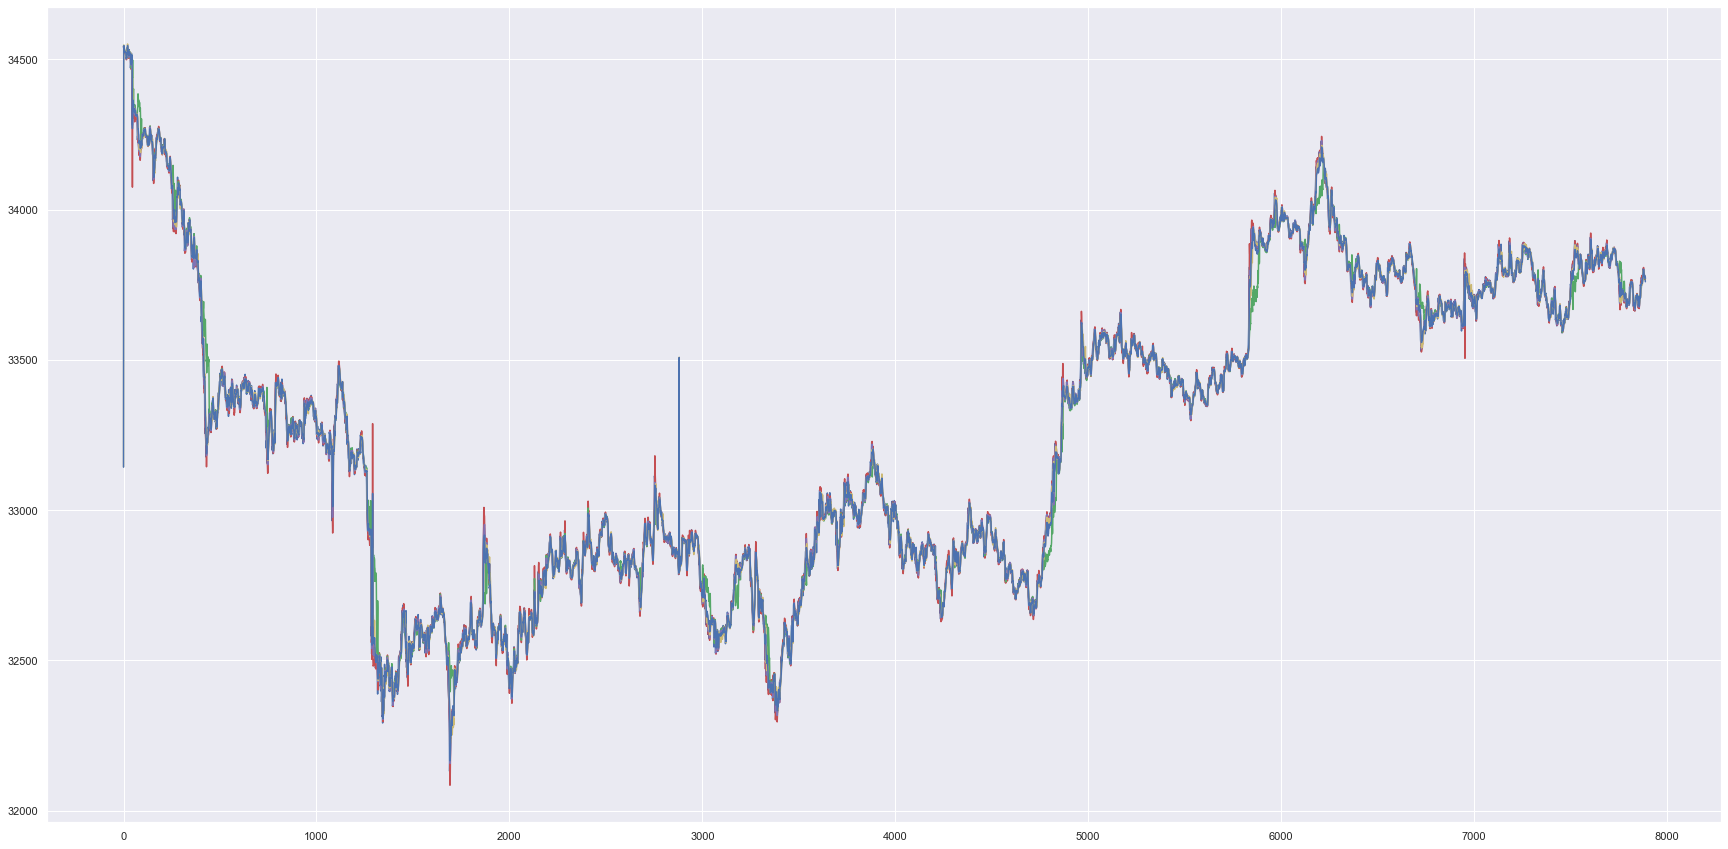

In [21]:
# plot forecasts against actual outcomes
plt.figure(figsize=(30,15))
plt.plot(all_models_df["price_avg"])
plt.plot(all_models_df["arima"], color='r')
plt.plot(all_models_df["varmax"], color='g')
plt.plot(all_models_df["ses"], color='m')
plt.plot(all_models_df["rf"], color='y')
plt.plot(all_models_df["overall"], color='b')
plt.show()